In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

# Import dataset and cleaning

In [2]:
df2018 = pd.read_csv('/Users/jaimesastrecrespo/DAFT_1022/Final_project/spotify_App/my_spotify_2018.csv')
df2019 = pd.read_csv('/Users/jaimesastrecrespo/DAFT_1022/Final_project/spotify_App/my_spotify_2019.csv')
df2020 = pd.read_csv('/Users/jaimesastrecrespo/DAFT_1022/Final_project/spotify_App/my_spotify_2020.csv')
df2021 = pd.read_csv('/Users/jaimesastrecrespo/DAFT_1022/Final_project/spotify_App/my_spotify_2021.csv')
df2022 = pd.read_csv('/Users/jaimesastrecrespo/DAFT_1022/Final_project/spotify_App/my_spotify_2022.csv')

In [3]:
df2018['year_playlist'] = 2018
df2019['year_playlist'] = 2019
df2020['year_playlist'] = 2020
df2021['year_playlist'] = 2021
df2022['year_playlist'] = 2022


In [4]:
list_years = [df2018  ,df2019 , df2020 , df2021 , df2022]

In [5]:
df_historical = pd.concat(list_years, ignore_index=True )

In [6]:
del df_historical['Unnamed: 0']

In [7]:
df_historical

,track_name,album,track_id,artist,duration,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,year_playlist,Timeframe
0,Fresas con nata,Fresas con nata,48sq0JdNEbXhQTdAorTzC9,Ayax y Prok,210000,0,0.824,0.617,8,-10.429,1,0.4370,0.126000,0.000000,0.1050,0.814,115.899,2018,NaN
1,Amén,Pa'l Coche,1PLxoOKyLKqicE5ErhrzkF,Cruz Cafuné,191478,42,0.685,0.480,2,-10.174,0,0.3350,0.130000,0.000000,0.1190,0.440,183.973,2018,NaN
2,Llórame - Acústico,Llórame (Acústico),1eFx4b7oW6VGtxGBz6aTrW,Zetazen,233453,45,0.537,0.468,6,-8.551,1,0.0606,0.946000,0.000000,0.0980,0.306,102.725,2018,NaN
3,Nit salvatge,Nit salvatge,3TwSlfvFPPoz0K1yL1Ujxn,Smoking Souls,259833,40,0.587,0.675,10,-6.734,1,0.0313,0.000089,0.000030,0.0984,0.382,109.978,2018,NaN
4,Amorfoda,Amorfoda,3ITvHA9zhZZdBJsOsAUegF,Bad Bunny,155675,0,0.742,0.432,9,-7.539,0,0.0615,0.984000,0.000058,0.0796,0.252,148.005,2018,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,Rockadown Subway Session,Rockadown Subway Session,3bdhZxL276JwNlNsQgu51s,Vanupié,214041,0,0.650,0.648,6,-6.694,0,0.3390,0.525000,0.000000,0.6830,0.792,140.607,2022,long term
546,Je veux,Zaz,734dz1YaFITwawPpM25fSt,Zaz,215933,68,0.525,0.807,2,-6.366,0,0.0725,0.251000,0.000000,0.0504,0.741,155.397,2022,long term
547,Redemption Song,Uprising,26PwuMotZqcczKLHi4Htz3,Bob Marley & The Wailers,233560,69,0.671,0.256,7,-10.743,1,0.0387,0.608000,0.000000,0.0737,0.694,115.871,2022,long term
548,Last Kiss,Last Kiss,0QnONzv3TvHAWk294h6DaQ,Pearl Jam,195466,71,0.622,0.692,7,-6.970,1,0.0276,0.363000,0.000158,0.1930,0.774,112.053,2022,long term


In [8]:
# New column in seconds, drop miliseconds
df_historical['duration_ms'] = round(df_historical['duration']/1000,0)
df_historical.drop("duration",axis=1, inplace=True)

In [9]:
df_historical.head()

,track_name,album,track_id,artist,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,year_playlist,Timeframe,duration_ms
0,Fresas con nata,Fresas con nata,48sq0JdNEbXhQTdAorTzC9,Ayax y Prok,0,0.824,0.617,8,-10.429,1,0.4370,0.126000,0.000000,0.1050,0.814,115.899,2018,NaN,210.0
1,Amén,Pa'l Coche,1PLxoOKyLKqicE5ErhrzkF,Cruz Cafuné,42,0.685,0.480,2,-10.174,0,0.3350,0.130000,0.000000,0.1190,0.440,183.973,2018,NaN,191.0
2,Llórame - Acústico,Llórame (Acústico),1eFx4b7oW6VGtxGBz6aTrW,Zetazen,45,0.537,0.468,6,-8.551,1,0.0606,0.946000,0.000000,0.0980,0.306,102.725,2018,NaN,233.0
3,Nit salvatge,Nit salvatge,3TwSlfvFPPoz0K1yL1Ujxn,Smoking Souls,40,0.587,0.675,10,-6.734,1,0.0313,0.000089,0.000030,0.0984,0.382,109.978,2018,NaN,260.0
4,Amorfoda,Amorfoda,3ITvHA9zhZZdBJsOsAUegF,Bad Bunny,0,0.742,0.432,9,-7.539,0,0.0615,0.984000,0.000058,0.0796,0.252,148.005,2018,NaN,156.0


In [10]:
df_historical.isna().sum()

track_name            0
album                 0
track_id              0
artist                0
popularity            0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
year_playlist         0
Timeframe           400
duration_ms           0
dtype: int64

In [11]:
df_historical.columns

Index(['track_name', 'album', 'track_id', 'artist', 'popularity',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'year_playlist', 'Timeframe', 'duration_ms'],
      dtype='object')

In [12]:
del df_historical['Timeframe']

In [13]:
df_duplic = df_historical[df_historical.duplicated()]

In [14]:
print(df_duplic)
#make sense to have duplicates in some of the last rows because the last 150 songs are wrapped from my short,mid and long term of songs that I'm currently listening. (API of spotify)

                                      track_name  \
450                             No Me digas Nada   
451        Quevedo: Bzrp Music Sessions, Vol. 52   
453                              Ahora y Siempre   
455                                      Nonstop   
460                                 Buenos Genes   
462                            Los mismos clavos   
467                             Wild Irish Roses   
472                               Duerme Conmigo   
480                     Won't Bite (feat. Smino)   
485                                     Everlong   
495                                      My Hero   
508                             No Me digas Nada   
512        Quevedo: Bzrp Music Sessions, Vol. 52   
538  Livin It Up (with Post Malone & A$AP Rocky)   
539                              Ahora y Siempre   

                                     album                track_id  \
450                       No Me digas Nada  15wMJJiVpt2ABQw032Rywi   
451  Quevedo: Bzrp Music Se

In [15]:
df_historical.drop_duplicates(inplace=True)

In [16]:
df_historical.shape

(535, 18)

In [17]:
#df_historical.to_csv('my_historic_spotify.csv')

# EDA

In [18]:
df_historical= pd.read_csv('/Users/jaimesastrecrespo/DAFT_1022/Final_project/spotify_App/my_historic_spotify.csv')

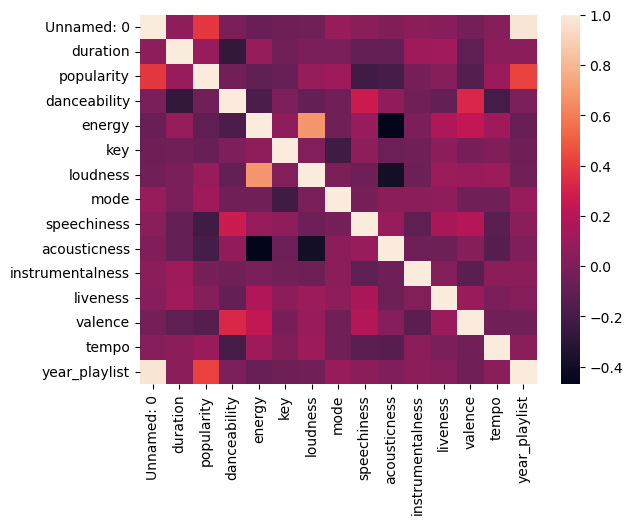

In [19]:
sns.heatmap(df_historical.corr());

In [20]:
df_historical.describe()

,Unnamed: 0,duration,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,year_playlist
count,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000
mean,268.687850,224320.242991,37.971963,0.660389,0.662943,5.291589,-7.246845,0.616822,0.159427,0.306309,0.010529,0.179428,0.555282,116.899738,2020.130841
std,157.157325,76847.677318,27.186090,0.144505,0.176090,3.571242,2.786641,0.486616,0.132950,0.275042,0.063277,0.139667,0.225224,30.023961,1.455225
min,0.000000,63673.000000,0.000000,0.167000,0.043400,0.000000,-31.042000,0.000000,0.024200,0.000014,0.000000,0.028000,0.059600,70.554000,2018.000000
25%,133.500000,178473.000000,1.000000,0.559500,0.538500,2.000000,-8.615000,0.000000,0.048600,0.056300,0.000000,0.098100,0.359500,92.894000,2019.000000
50%,267.000000,212369.000000,43.000000,0.671000,0.675000,5.000000,-6.779000,1.000000,0.106000,0.228000,0.000000,0.120000,0.562000,109.978000,2020.000000
75%,400.500000,251894.000000,58.000000,0.769500,0.807000,9.000000,-5.306500,1.000000,0.250000,0.514000,0.000030,0.210000,0.741000,137.954000,2022.000000
max,549.000000,891152.000000,97.000000,0.937000,0.977000,11.000000,-1.460000,1.000000,0.877000,0.984000,0.697000,0.840000,0.966000,203.599000,2022.000000


In [21]:
features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence','loudness' ]
df_mean = pd.DataFrame(df_historical[features].mean())

In [22]:
df_mean.reset_index(inplace=True)

In [23]:
df_mean.columns

Index(['index', 0], dtype='object')

In [24]:
df_mean

,index,0
0,acousticness,0.306309
1,danceability,0.660389
2,energy,0.662943
3,instrumentalness,0.010529
4,liveness,0.179428
5,speechiness,0.159427
6,valence,0.555282
7,loudness,-7.246845


In [25]:
df_mean['mean'] = df_mean[0]

In [26]:
del df_mean[0]

In [27]:
df_mean_copy = df_mean.copy()
# apply normalization techniques by 'mean' 1

df_mean_copy['mean'] = (df_mean_copy['mean'] - df_mean_copy['mean'].min()) / (df_mean_copy['mean'].max() - df_mean_copy['mean'].min())    
  
# view normalized data
display(df_mean_copy)

,index,mean
0,acousticness,0.954912
1,danceability,0.999677
2,energy,1.000000
3,instrumentalness,0.917518
4,liveness,0.938871
5,speechiness,0.936343
6,valence,0.986389
7,loudness,0.000000


In [28]:
df_mean_copy['mean'] = df_mean_copy[0]

KeyError: 0

In [ ]:
del df_mean_copy[0]

KeyError: 0

In [ ]:

fig = px.line_polar(df_mean_copy, r='mean', theta=features, line_close=True);
fig.show();

/Users/jaimesastrecrespo/opt/anaconda3/lib/python3.9/site-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [ ]:
fig = px.line_polar(df_mean, r='mean', theta=features, line_close=True);
fig.show();

/Users/jaimesastrecrespo/opt/anaconda3/lib/python3.9/site-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

